<a href="https://colab.research.google.com/github/HazemmoAlsady/AWN_Graduation_Project/blob/main/Hazem's%20edits/Rule_Based_Assistance_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rule-Based Assistance Type Classification**

> Add blockquote



In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/cleaned_awn_data.xlsx')


In [19]:
import re

df_rb = df.copy()

# نشيل الحالات الفاضية
df_rb = df_rb[
    (df_rb["request_text"].notna()) &
    (df_rb["request_text"] != "Unknown")
].reset_index(drop=True)

In [20]:
df.shape

(54236, 22)

In [21]:
ASSISTANCE_RULES = {
    "food": [
        "سلة", "غذائية", "طعام", "أكل", "مواد غذائية", "غذاء"
    ],
    "medical": [
        "علاج", "دواء", "أدوية", "عملية", "تحاليل",
        "مرض", "مريض", "قلب", "ضغط", "سكر"
    ],
    "education": [
        "تعليم", "مدارس", "مدرسة", "دروس",
        "مصروفات", "كتب", "جامعة"
    ],
    "financial": [
        "مالية", "دخل", "ديون", "مساعدة مالية",
        "ظروف مادية", "سداد", "قرض"
    ],
    "disability_equipment": [
        "إعاقة", "ذوي إعاقة", "كرسي",
        "كرسي متحرك", "أطراف صناعية"
    ],
    "housing": [
        "سكن", "إيجار", "بيت", "مسكن",
        "شقة", "منزل"
    ]
}


In [22]:
def classify_assistance_rule_based(text):
    text = str(text)

    for label, keywords in ASSISTANCE_RULES.items():
        for kw in keywords:
            if re.search(kw, text):
                return label

    return "Unknown"


In [23]:
df_rb["assistance_type_rule"] = df_rb["request_text"].apply(
    classify_assistance_rule_based
)


In [24]:
from sklearn.metrics import classification_report, accuracy_score

# نشيل Unknown من التقييم
eval_df = df_rb[
    (df_rb["assistance_type"] != "Unknown") &
    (df_rb["assistance_type_rule"] != "Unknown")
]

print("Rule-Based Accuracy:",
      accuracy_score(eval_df["assistance_type"],
                     eval_df["assistance_type_rule"]))

print(classification_report(
    eval_df["assistance_type"],
    eval_df["assistance_type_rule"]
))


Rule-Based Accuracy: 0.934649866236445
                      precision    recall  f1-score   support

disability_equipment       0.50      1.00      0.67      3240
           education       1.00      1.00      1.00      6625
           financial       1.00      1.00      1.00      9672
                food       1.00      1.00      1.00      9834
             housing       1.00      0.50      0.67      6445
             medical       1.00      1.00      1.00     13151

            accuracy                           0.93     48967
           macro avg       0.92      0.92      0.89     48967
        weighted avg       0.97      0.93      0.93     48967



In [25]:
def assistance_classification_module(request_text):
    """
    Rule-guided NLP-assisted Assistance Classification
    """
    return classify_assistance_rule_based(request_text)


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

test_df = df_rb[
    (df_rb["assistance_type"] != "Unknown") &
    (df_rb["assistance_type_rule"] != "Unknown")
].copy()

print("Test samples:", len(test_df))


Test samples: 48967


In [27]:
rule_acc = accuracy_score(
    test_df["assistance_type"],
    test_df["assistance_type_rule"]
)

print("Rule-Based Test Accuracy:", rule_acc)


Rule-Based Test Accuracy: 0.934649866236445


In [28]:
print("Rule-Based Classification Report")
print(classification_report(
    test_df["assistance_type"],
    test_df["assistance_type_rule"]
))


Rule-Based Classification Report
                      precision    recall  f1-score   support

disability_equipment       0.50      1.00      0.67      3240
           education       1.00      1.00      1.00      6625
           financial       1.00      1.00      1.00      9672
                food       1.00      1.00      1.00      9834
             housing       1.00      0.50      0.67      6445
             medical       1.00      1.00      1.00     13151

            accuracy                           0.93     48967
           macro avg       0.92      0.92      0.89     48967
        weighted avg       0.97      0.93      0.93     48967



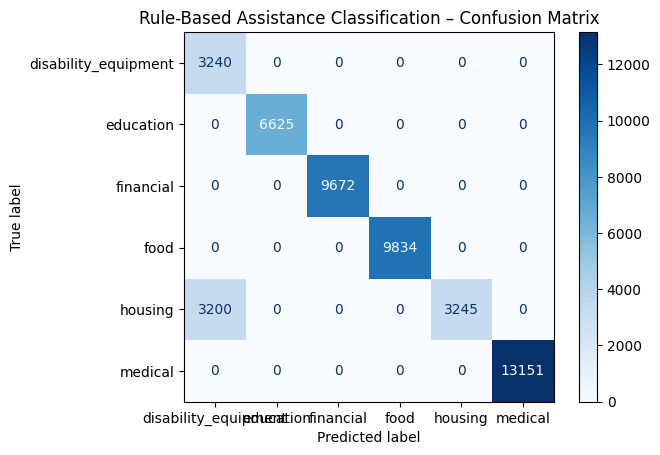

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    test_df["assistance_type"],
    test_df["assistance_type_rule"],
    cmap="Blues"
)

plt.title("Rule-Based Assistance Classification – Confusion Matrix")
plt.show()


In [30]:
samples = [
    "الأسرة تحتاج سلة غذائية بسبب ضعف الدخل",
    "الحالة تحتاج علاج وأدوية شهريًا",
    "الطفل يحتاج مصاريف مدارس وكتب",
    "الشخص من ذوي إعاقة ويحتاج كرسي متحرك",
    "الأسرة تعاني من ديون شديدة وتحتاج مساعدة مالية",
    "الأسرة بلا سكن ثابت وتحتاج إيجار"
]

for s in samples:
    print(s, "→", assistance_classification_module(s))


الأسرة تحتاج سلة غذائية بسبب ضعف الدخل → food
الحالة تحتاج علاج وأدوية شهريًا → medical
الطفل يحتاج مصاريف مدارس وكتب → education
الشخص من ذوي إعاقة ويحتاج كرسي متحرك → disability_equipment
الأسرة تعاني من ديون شديدة وتحتاج مساعدة مالية → financial
الأسرة بلا سكن ثابت وتحتاج إيجار → housing


In [31]:
import joblib

ml_assistance_model = joblib.load(
    "/content/drive/MyDrive/graduation_project/assistance_ml_model.pkl"
)


In [32]:
def hybrid_assistance_classifier(text):
    """
    Hybrid Assistance Classification:
    1) Rule-Based first
    2) ML fallback
    """

    rule_pred = classify_assistance_rule_based(text)

    if rule_pred != "Unknown":
        return rule_pred, "Rule-Based"
    else:
        ml_pred = ml_assistance_model.predict([text])[0]
        return ml_pred, "ML-Based"


In [33]:
samples = [
    "الأسرة تحتاج سلة غذائية بسبب ضعف الدخل",
    "الحالة تعاني من مرض مزمن وتحتاج علاج",
    "لا يوجد مصدر دخل والأسرة تعاني من ظروف صعبة"
]

for s in samples:
    pred, source = hybrid_assistance_classifier(s)
    print(f"{s} → {pred} ({source})")


الأسرة تحتاج سلة غذائية بسبب ضعف الدخل → food (Rule-Based)
الحالة تعاني من مرض مزمن وتحتاج علاج → medical (Rule-Based)
لا يوجد مصدر دخل والأسرة تعاني من ظروف صعبة → financial (Rule-Based)
